In [367]:
import numpy as np
import pandas as pd

In [368]:
data=pd.read_csv(r"C:\Users\Dell\Desktop\DATA\laptop_data.csv")

In [369]:
data.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [371]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [372]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [373]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')

In [374]:
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [376]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

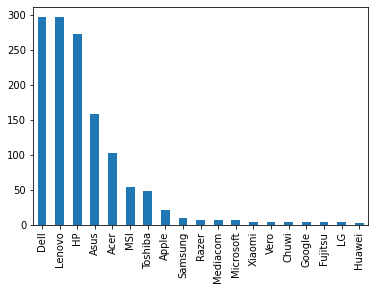

In [377]:
data['Company'].value_counts().plot(kind='bar')

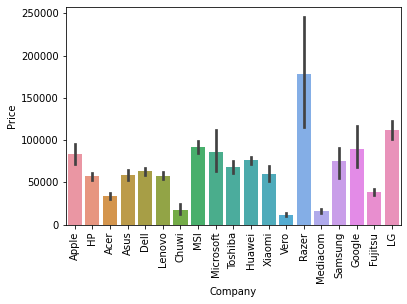

In [378]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

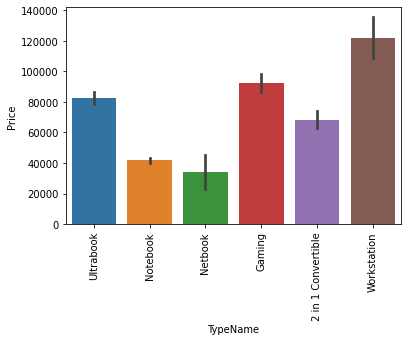

In [379]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [380]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [381]:
data["Touchscreen"]=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [382]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.200,0
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.264,0
496,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.392,0
955,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,168045.120,0
1100,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.50,60480.792,0


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

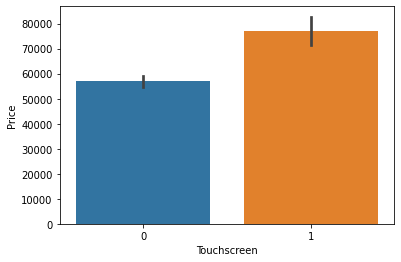

In [383]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])

In [384]:
data["IPS"]=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:xlabel='IPS', ylabel='Price'>

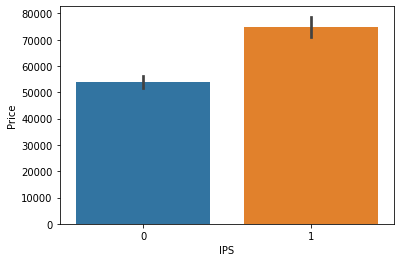

In [385]:
sns.barplot(x=data['IPS'],y=data['Price'])

In [386]:
data1=data['ScreenResolution'].str.split('x',n=1,expand=True)

In [387]:
data['x_resolution']=data1[0]
data['y_resolution']=data1[1]

In [388]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_resolution,y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [389]:
data['x_resolution']=data['x_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0] )

In [390]:
data['x_resolution']=data['x_resolution'].astype('int')
data['y_resolution']=data['y_resolution'].astype('int')

In [391]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
x_resolution    0.556529
y_resolution    0.552809
Name: Price, dtype: float64

In [392]:
data['pix_per_inch']=((data['x_resolution']**2 + data['y_resolution']**2)**0.5/data['Inches']).astype('float')

In [393]:
data.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
x_resolution    0.556529
y_resolution    0.552809
pix_per_inch    0.473487
Name: Price, dtype: float64

In [394]:
data.drop(columns=['ScreenResolution'],inplace=True)


In [395]:
data.drop(columns=['x_resolution','y_resolution','Inches'],inplace=True)

In [396]:
data.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pix_per_inch
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [397]:
data['Cpu_name']=data['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
data

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pix_per_inch,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [398]:
def processor(text):
    if text=='Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'other Intel processors'
        else:
            return 'AMD processor' 

In [399]:
data['processor_brand']=data['Cpu_name'].apply(processor)

In [400]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pix_per_inch,Cpu_name,processor_brand
152,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,26533.44,0,0,100.454670,Intel Core i5,Intel Core i5
386,Lenovo,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.50,29250.72,0,1,165.632118,Intel Core i3,Intel Core i3
542,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,61005.60,0,1,276.053530,Intel Core i7,Intel Core i7
404,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,119826.72,0,0,127.335675,Intel Core i7,Intel Core i7
33,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,99580.32,1,0,276.053530,Intel Core i7,Intel Core i7


In [401]:
data['processor_brand'].value_counts()

Intel Core i7             527
Intel Core i5             423
other Intel processors    154
Intel Core i3             136
AMD processor              63
Name: processor_brand, dtype: int64

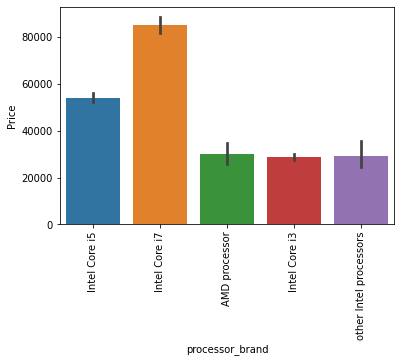

In [402]:
sns.barplot(x=data['processor_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [403]:
data.drop(columns=['Cpu','Cpu_name'],inplace=True)

In [404]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-404-9b0c180e9b09>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
<ipython-input-404-9b0c180e9b09>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [405]:
data.drop(columns=['Memory'],inplace=True)

In [406]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pix_per_inch,processor_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [407]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
pix_per_inch     0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [408]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [409]:
data['Gpu_brand']=data['Gpu'].apply(lambda x:x.split()[0])

In [410]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [411]:
data=data[data['Gpu_brand']!='ARM']

In [412]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

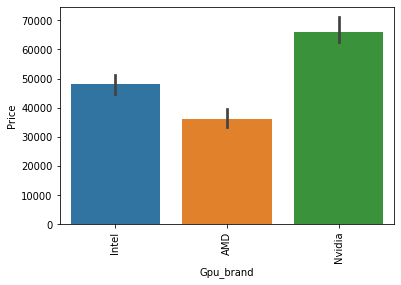

In [413]:
sns.barplot(x=data['Gpu_brand'],y=data['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [414]:
data.drop(columns=['Gpu'],inplace=True)

<ipython-input-414-0ca0cea83f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'],inplace=True)


In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Ram              1302 non-null   int32  
 3   OpSys            1302 non-null   object 
 4   Weight           1302 non-null   float32
 5   Price            1302 non-null   float64
 6   Touchscreen      1302 non-null   int64  
 7   IPS              1302 non-null   int64  
 8   pix_per_inch     1302 non-null   float64
 9   processor_brand  1302 non-null   object 
 10  HDD              1302 non-null   int64  
 11  SSD              1302 non-null   int64  
 12  Gpu_brand        1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [416]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [417]:
def os(input):
    if input=='Windows 10' or input=='Windows 7' or input=='Windows 10 S':
        return 'Windows'
    elif input=='macOS' or input=='Mac OS X':
        return 'Mac'
    else:
        return 'others/No OS/Linux'

In [418]:
data['OS']=data['OpSys'].apply(os)

<ipython-input-418-0b77bd367ed5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OS']=data['OpSys'].apply(os)


In [419]:
data.drop(columns=['OpSys'],inplace=True)

<ipython-input-419-e31033eb713f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace=True)


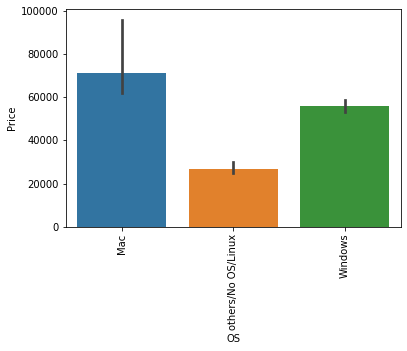

In [420]:
sns.barplot(x=data['OS'],y=data['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

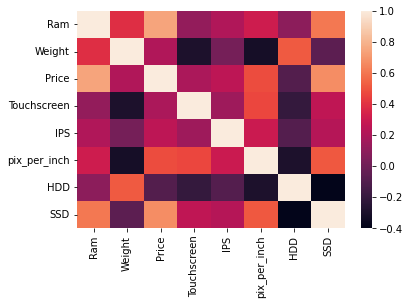

In [421]:
sns.heatmap(data.corr())

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

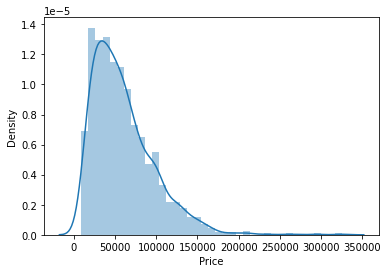

In [422]:
sns.distplot(data['Price'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

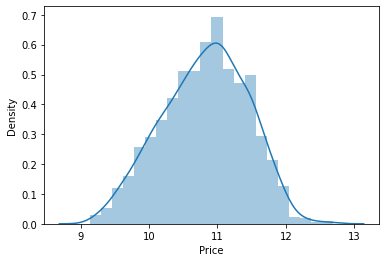

In [423]:
sns.distplot(np.log(data['Price']))

In [424]:
#data['Gpu_brand']=data['Gpu_brand'].str.replace('Intel ','intel')
#data['Gpu_brand']=data['Gpu_brand'].astype('str')

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1302 non-null   object 
 1   TypeName         1302 non-null   object 
 2   Ram              1302 non-null   int32  
 3   Weight           1302 non-null   float32
 4   Price            1302 non-null   float64
 5   Touchscreen      1302 non-null   int64  
 6   IPS              1302 non-null   int64  
 7   pix_per_inch     1302 non-null   float64
 8   processor_brand  1302 non-null   object 
 9   HDD              1302 non-null   int64  
 10  SSD              1302 non-null   int64  
 11  Gpu_brand        1302 non-null   object 
 12  OS               1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [426]:
X=data.drop(columns=['Price'])
y=np.log(data['Price'])

In [427]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,pix_per_inch,processor_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel processors,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [428]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [429]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [430]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [431]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8073277448418668
error:  0.2101782797642886


In [432]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=Ridge(alpha=20)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8126235322370259
error:  0.21000515142339515


In [433]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8082965199828074
error:  0.20991352428203633


In [434]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3,n_jobs=20)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.803148868705085
error:  0.19264883332948868


In [435]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8445446251722226
error:  0.17981435611305346


In [436]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8852126535925404
error:  0.16047750866393973


In [437]:
step1=ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
    ],
    remainder='passthrough')
step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))

r2 score:  0.8820632864147311
error:  0.1594582972931677


In [438]:
step1 = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('et',et)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('r2 score: ',r2_score(y_test,y_pred))
print('error: ',mean_absolute_error(y_test,y_pred))


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2 score:  0.8908975220653871
error:  0.15663292249384145


In [439]:
import pickle
pickle.dump(data,open('lapdata.pkl','wb'))
pickle.dump(pipe,open('pipelap.pkl','wb'))